<h2>异常值处理</h2>

<h2>1 数据读取<h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X_train_party1 = pd.read_csv("data/X_train_party1_post.csv")
X_test_party1 = pd.read_csv("data/X_test_party1_post.csv")
Y_train_party1 = pd.read_csv("data/Y_train_party1.csv")
Y_test_party1 = pd.read_csv("data/Y_test_party1.csv")

In [3]:
X_train_party1.shape

(640000, 23)

In [4]:
X_test_party1.shape

(160000, 23)

In [5]:
X_train_party1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640000 entries, 0 to 639999
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  640000 non-null  int64  
 1   loanAmnt            640000 non-null  float64
 2   term                640000 non-null  int64  
 3   interestRate        640000 non-null  float64
 4   installment         640000 non-null  float64
 5   grade               640000 non-null  int64  
 6   subGrade            640000 non-null  int64  
 7   employmentTitle     640000 non-null  float64
 8   employmentLength    640000 non-null  int64  
 9   homeOwnership       640000 non-null  int64  
 10  annualIncome        640000 non-null  float64
 11  verificationStatus  640000 non-null  int64  
 12  purpose             640000 non-null  int64  
 13  postCode            640000 non-null  float64
 14  regionCode          640000 non-null  int64  
 15  dti                 640000 non-nul

In [6]:
X_test_party1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  160000 non-null  int64  
 1   loanAmnt            160000 non-null  float64
 2   term                160000 non-null  int64  
 3   interestRate        160000 non-null  float64
 4   installment         160000 non-null  float64
 5   grade               160000 non-null  int64  
 6   subGrade            160000 non-null  int64  
 7   employmentTitle     160000 non-null  float64
 8   employmentLength    160000 non-null  int64  
 9   homeOwnership       160000 non-null  int64  
 10  annualIncome        160000 non-null  float64
 11  verificationStatus  160000 non-null  int64  
 12  purpose             160000 non-null  int64  
 13  postCode            160000 non-null  float64
 14  regionCode          160000 non-null  int64  
 15  dti                 160000 non-nul

<h2>2. 查看数据分布</h2>

能够进行异常值处理的特征有：loanAmnt、interestRate、installment、ficoRangeLow、ficoRangeHigh

<h3>2.1 训练集3sigma异常值处理</h3>

In [7]:
X_train_party1['annualIncome'].value_counts()

60000.0     24579
50000.0     21576
65000.0     18625
70000.0     17518
40000.0     16711
            ...  
77960.0         1
77968.0         1
77970.0         1
77972.0         1
159800.0        1
Name: annualIncome, Length: 38425, dtype: int64

annualIncome中有一个异常值emm，个人感觉不是异常值

In [8]:
from scipy import stats

In [1]:
#异常值检验
def checkOutliers(data, col):
    u = data.mean()  # 计算均值
    std = data.std()  # 计算标准差
    stats.kstest(data, 'norm', (u, std))
    # 绘制数据密度曲线
    fig = plt.figure(figsize = (10,6))
    plot_name = f"{col}"
    data.plot(kind = 'kde',grid = True,style = '-k',title = '密度曲线')
    plt.axvline(u+3*std, color='r',linestyle="--",alpha=0.8) 
    plt.axvline(u-3*std, color='r',linestyle="--",alpha=0.8)
    plt.title(plot_name)
    plt.show()
    
    error_index = data[np.abs(data - u) > 3*std].index
    return error_index

In [10]:
X_train_party1.columns

Index(['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'grade',
       'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership',
       'annualIncome', 'verificationStatus', 'purpose', 'postCode',
       'regionCode', 'dti', 'delinquency_2years', 'ficoRangeLow',
       'ficoRangeHigh', 'openAcc', 'pubRec', 'pubRecBankruptcies',
       'issueDays'],
      dtype='object')

In [11]:
train1_col = ['loanAmnt', 'interestRate', 'installment', 'employmentTitle',
       'dti', 'ficoRangeLow', 'ficoRangeHigh']

In [12]:
def checkColumn(data, col_list):
    outlier_list = []
    error_index_list = []
    for col in col_list:
        error_index = checkOutliers(data[col], col)
        outlier_list.append(len(error_index))
        error_index_list.extend(error_index)
    return outlier_list, set(error_index_list)

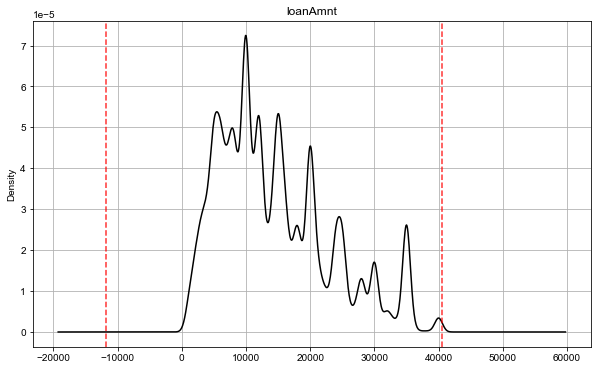

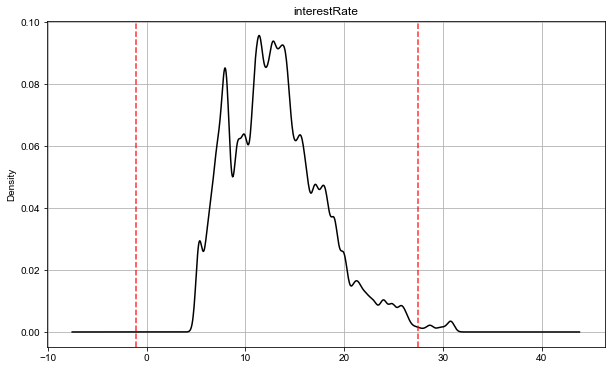

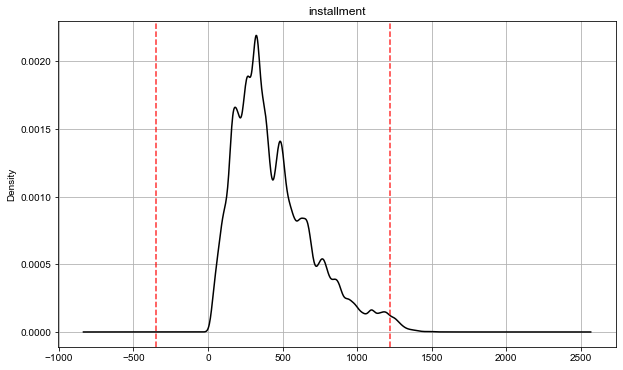

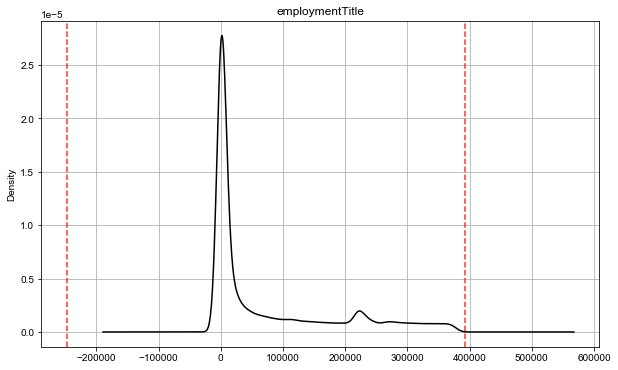

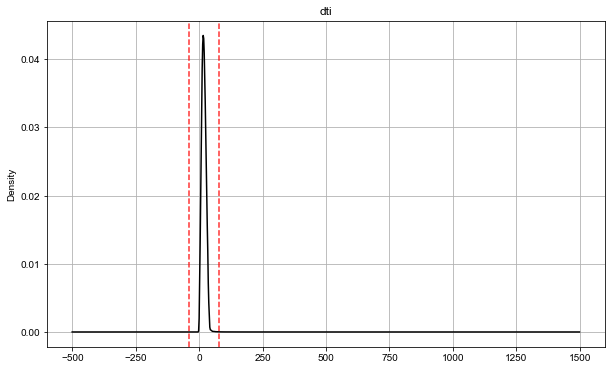

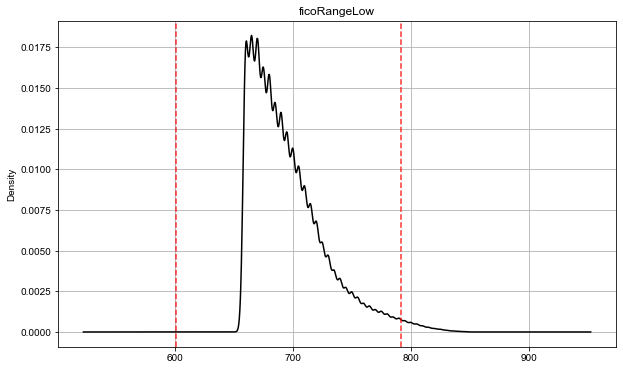

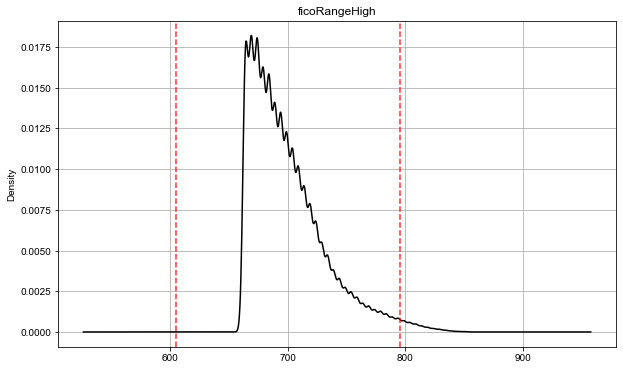

In [13]:
outlier_list, error_index_list = checkColumn(X_train_party1, train1_col)

In [14]:
outlier_list

[0, 4563, 6325, 0, 687, 9384, 9384]

In [15]:
error_index_list

{491524,
 5,
 393225,
 131081,
 11,
 163851,
 65550,
 458767,
 426000,
 229392,
 262162,
 360467,
 491540,
 131094,
 426006,
 557079,
 229401,
 196633,
 393243,
 294940,
 491548,
 229406,
 163876,
 393253,
 557094,
 360487,
 163880,
 622636,
 327728,
 491572,
 294966,
 426038,
 589880,
 589881,
 524346,
 622650,
 327738,
 524349,
 557116,
 524355,
 68,
 622661,
 32836,
 262214,
 262216,
 131145,
 426054,
 491595,
 557128,
 462431,
 163919,
 229460,
 85,
 229461,
 458842,
 32859,
 524380,
 327774,
 327775,
 32864,
 426080,
 524386,
 557154,
 262244,
 393318,
 295017,
 622699,
 98414,
 458867,
 524406,
 262263,
 557177,
 65657,
 426109,
 229502,
 426111,
 622718,
 131201,
 65664,
 229506,
 327809,
 262277,
 458879,
 360584,
 163977,
 589963,
 65676,
 98443,
 229516,
 65679,
 458895,
 262289,
 295058,
 360595,
 524438,
 65690,
 65698,
 98468,
 491685,
 166,
 229543,
 327847,
 360615,
 295082,
 360624,
 65715,
 65716,
 393399,
 131257,
 426169,
 524476,
 393406,
 191,
 32959,
 32964,
 9850

In [16]:
len(error_index_list)

20617

In [17]:
X_train_party1 = X_train_party1.drop(error_index_list)

In [18]:
X_train_party1

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,issueDays
0,52811,10000.0,3,20.75,375.47,5,22,80.0,10,2,...,373.0,13,25.07,0.0,665.0,669.0,16.0,0.0,0.0,3196
1,475516,4000.0,3,24.50,157.99,6,28,286634.0,1,1,...,51.0,13,1.29,0.0,685.0,689.0,3.0,0.0,0.0,2222
2,122130,20000.0,3,6.11,609.44,1,1,229.0,7,1,...,708.0,13,11.29,0.0,705.0,709.0,5.0,1.0,1.0,4048
3,701379,7500.0,3,20.99,282.53,5,24,6731.0,10,1,...,188.0,23,35.52,0.0,675.0,679.0,11.0,1.0,1.0,2679
4,672853,6025.0,3,13.67,204.96,3,14,485.0,1,0,...,69.0,26,38.40,1.0,685.0,689.0,16.0,0.0,0.0,3105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639994,644167,20000.0,5,21.99,552.27,5,25,105774.0,2,0,...,253.0,21,29.51,0.0,690.0,694.0,14.0,0.0,0.0,2771
639996,365838,24000.0,5,14.46,564.18,3,14,2976.0,10,0,...,316.0,26,18.33,0.0,665.0,669.0,8.0,1.0,1.0,3196
639997,131932,8000.0,3,10.42,259.72,2,8,153023.0,2,1,...,539.0,42,32.93,0.0,685.0,689.0,4.0,0.0,0.0,3806
639998,671155,20000.0,3,9.16,637.49,2,7,23407.0,1,0,...,35.0,14,23.74,0.0,765.0,769.0,13.0,0.0,0.0,3167


In [19]:
X_train_party1.to_csv("data/X_train_party1_post2.csv", index=False)

训练集的y值也需要对应处理

In [20]:
Y_train_party1 = Y_train_party1.drop(error_index_list)

In [21]:
Y_train_party1.shape

(619383, 1)

In [22]:
Y_train_party1.to_csv("data/Y_train_party1_post2.csv", index=False)

<h3>2.2 测试集3sigma异常值处理</h3>

In [23]:
X_test_party1['annualIncome'].value_counts()

60000.0     6103
50000.0     5486
70000.0     4558
65000.0     4501
40000.0     4346
            ... 
72240.0        1
42619.0        1
23450.0        1
128300.0       1
40450.0        1
Name: annualIncome, Length: 12810, dtype: int64

In [24]:
test1_col = ['loanAmnt', 'interestRate', 'installment', 'employmentTitle',
       'dti', 'ficoRangeLow', 'ficoRangeHigh']

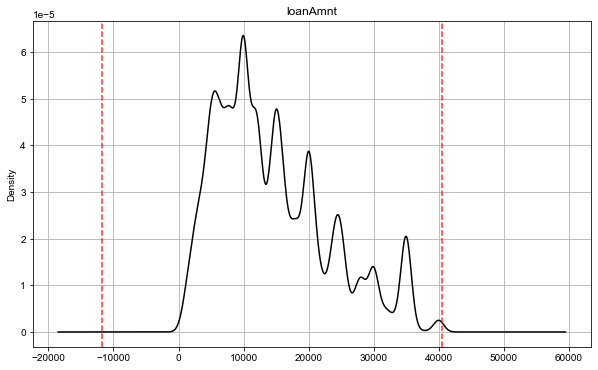

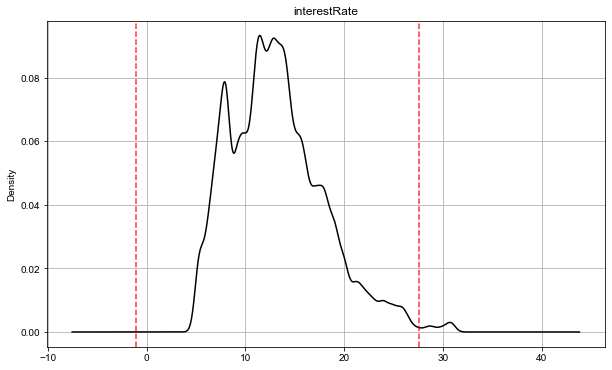

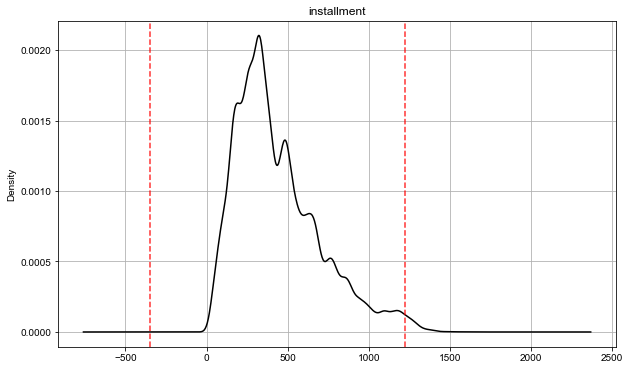

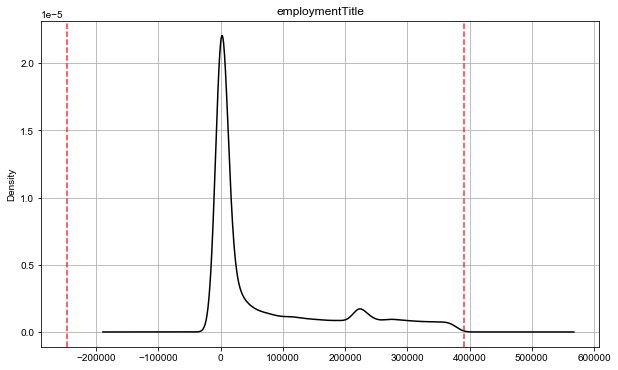

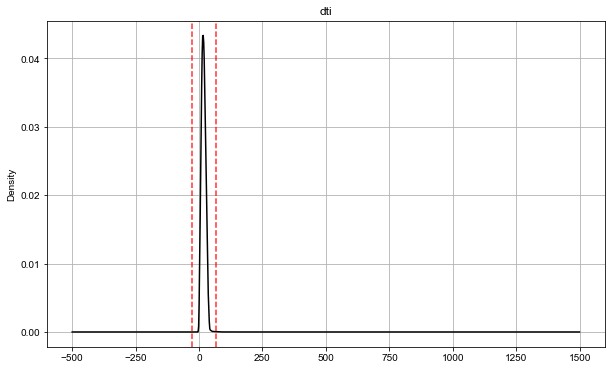

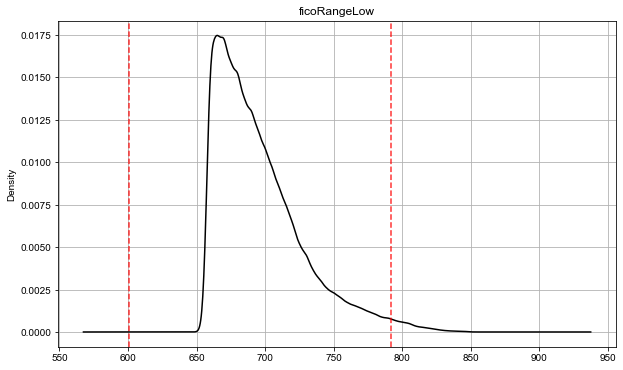

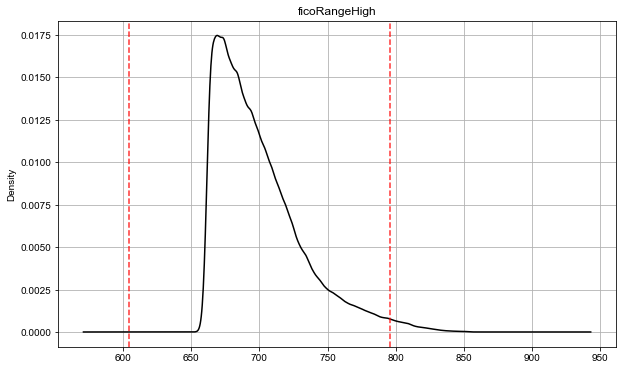

In [25]:
outlier_list, error_index_list = checkColumn(X_test_party1, test1_col)

In [26]:
outlier_list

[0, 1178, 1607, 0, 185, 2355, 2355]

In [27]:
X_test_party1 = X_test_party1.drop(error_index_list)

In [28]:
X_test_party1.to_csv("data/X_test_party1_post2.csv", index=False)

In [29]:
Y_test_party1 = Y_test_party1.drop(error_index_list)

In [30]:
Y_test_party1.shape

(154770, 1)

In [31]:
Y_test_party1.to_csv("data/Y_test_party1_post2.csv", index=False)

In [34]:
X_train_party1.shape

(619383, 23)

In [35]:
X_test_party1.shape

(154770, 23)

In [36]:
Y_train_party1.shape

(619383, 1)

In [38]:
Y_test_party1.shape

(154770, 1)

In [39]:
X_train_party2 = pd.read_csv("data/outlier_delete/party2/X_train_party2_post.csv")
X_test_party2 = pd.read_csv("data/outlier_delete/party2/X_test_party2_post.csv")

In [40]:
X_train_party2.shape

(640000, 24)

In [41]:
X_test_party2.shape

(160000, 24)